# Data Handling

In [475]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [476]:
FILE_PATH = os.path.join(os.getcwd(), 'Dataset','first inten project.csv')
df = pd.read_csv(FILE_PATH)

In [477]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [478]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [479]:
df.duplicated().sum()

0

In [480]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [481]:
# create new features for number of people and number of nights
df['number_of_people'] = df['number_of_adults'] + df['number_of_children']
df['number_of_nights'] = df['number_of_weekend_nights'] + df['number_of_week_nights']

In [482]:
df.drop(columns=['booking_id', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights'], axis = 1,inplace=True)


In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36285 non-null  object 
 1   car_parking_space    36285 non-null  int64  
 2   room_type            36285 non-null  object 
 3   lead_time            36285 non-null  int64  
 4   market_segment_type  36285 non-null  object 
 5   repeated             36285 non-null  int64  
 6   p-c                  36285 non-null  int64  
 7   p-not-c              36285 non-null  int64  
 8   average_price        36285 non-null  float64
 9   special_requests     36285 non-null  int64  
 10  date_of_reservation  36285 non-null  object 
 11  booking_status       36285 non-null  object 
 12  number_of_people     36285 non-null  int64  
 13  number_of_nights     36285 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 3.9+ MB


<Axes: xlabel='number_of_people'>

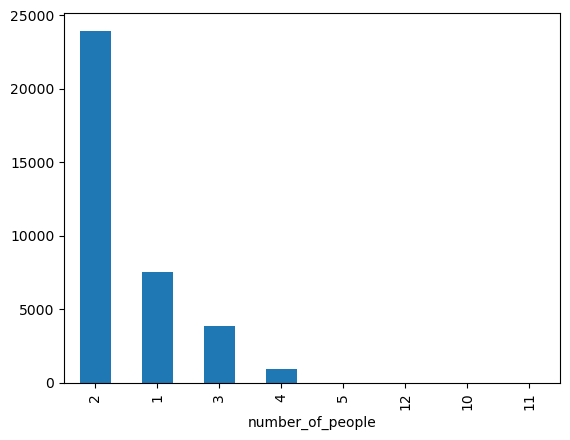

In [484]:
df['number_of_people'].value_counts().plot(kind='bar')

<Axes: xlabel='number_of_nights'>

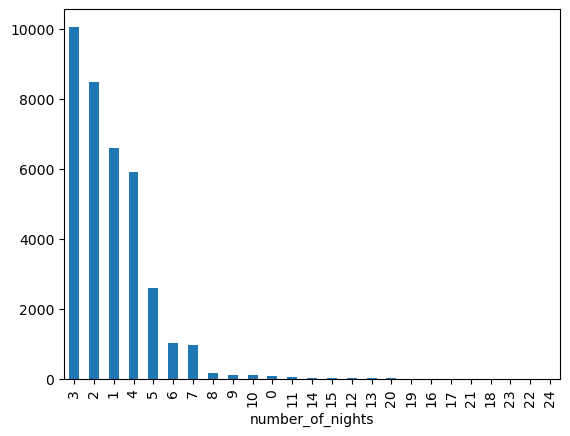

In [485]:
df['number_of_nights'].value_counts().plot(kind='bar')

In [486]:
# these are the rows with invalid date format, we will replace them 
df['date_of_reservation'][[ 2626,  3677,  5600,  6343,  7648,  8000,  8989,  9153,  9245,  9664,
        9934, 10593, 10652, 10747, 11881, 13958, 14304, 15363, 15438, 17202,
       18380, 18534, 18680, 19013, 20419, 21674, 21688, 26108, 27559, 27928,
       30552, 30616, 30632, 30839, 32041, 34638, 35481]]

2626     2018-2-29
3677     2018-2-29
5600     2018-2-29
6343     2018-2-29
7648     2018-2-29
8000     2018-2-29
8989     2018-2-29
9153     2018-2-29
9245     2018-2-29
9664     2018-2-29
9934     2018-2-29
10593    2018-2-29
10652    2018-2-29
10747    2018-2-29
11881    2018-2-29
13958    2018-2-29
14304    2018-2-29
15363    2018-2-29
15438    2018-2-29
17202    2018-2-29
18380    2018-2-29
18534    2018-2-29
18680    2018-2-29
19013    2018-2-29
20419    2018-2-29
21674    2018-2-29
21688    2018-2-29
26108    2018-2-29
27559    2018-2-29
27928    2018-2-29
30552    2018-2-29
30616    2018-2-29
30632    2018-2-29
30839    2018-2-29
32041    2018-2-29
34638    2018-2-29
35481    2018-2-29
Name: date_of_reservation, dtype: object

In [487]:
# i chose to replace the invalid date with 2018-2-28 because 2018 is not a leap year and it will be the closest valid date to 2018-2-29
df['date_of_reservation'] = df['date_of_reservation'].replace('2018-2-29', '2018-2-28')

In [488]:
# convert date_of_reservation to datetime format
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format= 'mixed', errors='coerce')

In [489]:
# check if there are still any invalid dates
df['date_of_reservation'].isna().sum()

0

In [490]:
# create new features for year, month and day of reservation and drop the original date_of_reservation column
df['year'] = df['date_of_reservation'].dt.year
df['month'] = df['date_of_reservation'].dt.month
df['day'] = df['date_of_reservation'].dt.day
df.drop('date_of_reservation', axis=1, inplace=True)

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36285 non-null  object 
 1   car_parking_space    36285 non-null  int64  
 2   room_type            36285 non-null  object 
 3   lead_time            36285 non-null  int64  
 4   market_segment_type  36285 non-null  object 
 5   repeated             36285 non-null  int64  
 6   p-c                  36285 non-null  int64  
 7   p-not-c              36285 non-null  int64  
 8   average_price        36285 non-null  float64
 9   special_requests     36285 non-null  int64  
 10  booking_status       36285 non-null  object 
 11  number_of_people     36285 non-null  int64  
 12  number_of_nights     36285 non-null  int64  
 13  year                 36285 non-null  int32  
 14  month                36285 non-null  int32  
 15  day                  36285 non-null 

In [492]:
# Reorder columns to have 'booking_status' at the end
cols = list(df.columns)
cols.remove('booking_status')
df = df[cols + ['booking_status']]

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         36285 non-null  object 
 1   car_parking_space    36285 non-null  int64  
 2   room_type            36285 non-null  object 
 3   lead_time            36285 non-null  int64  
 4   market_segment_type  36285 non-null  object 
 5   repeated             36285 non-null  int64  
 6   p-c                  36285 non-null  int64  
 7   p-not-c              36285 non-null  int64  
 8   average_price        36285 non-null  float64
 9   special_requests     36285 non-null  int64  
 10  number_of_people     36285 non-null  int64  
 11  number_of_nights     36285 non-null  int64  
 12  year                 36285 non-null  int32  
 13  month                36285 non-null  int32  
 14  day                  36285 non-null  int32  
 15  booking_status       36285 non-null 

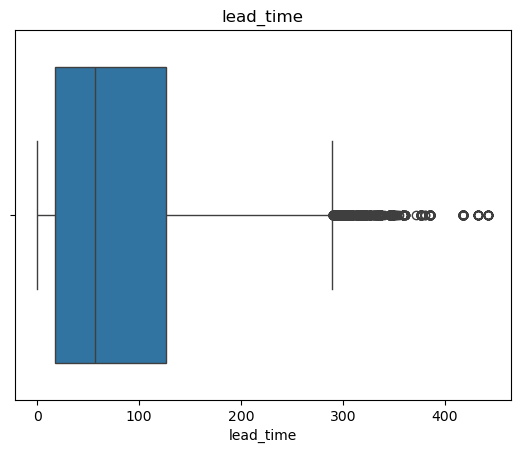

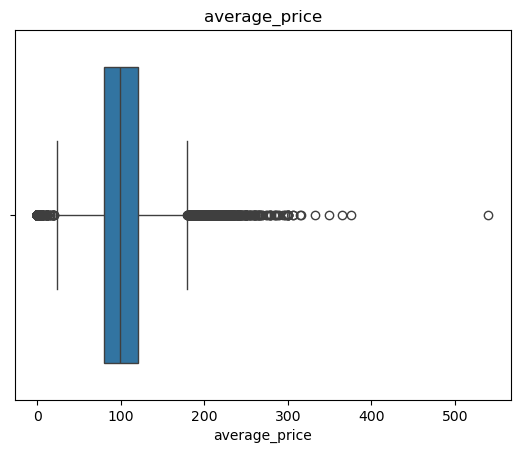

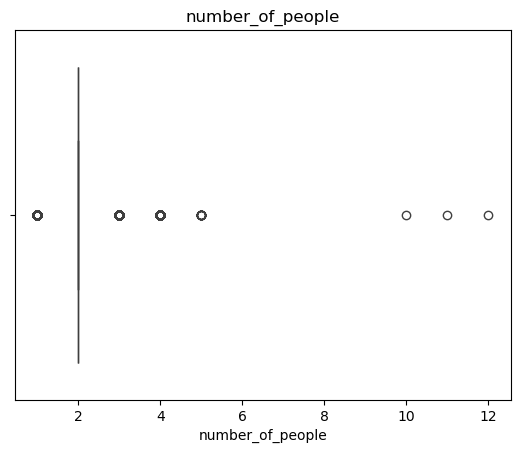

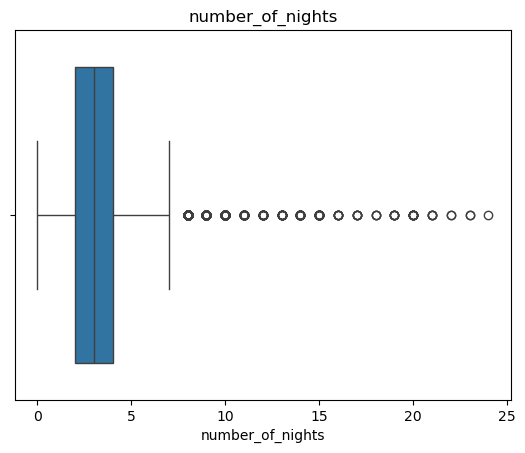

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

# box plots for numeric features to check for outliers
numeric_cols = ['lead_time', 'average_price', 'number_of_people', 'number_of_nights']

for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [495]:
# convert booking_status to binary values
df['booking_status'] = df['booking_status'].map({'Canceled': 1, 'Not_Canceled': 0})

In [496]:
# split the data into training and testing sets
X = df.drop('booking_status', axis=1)
y = df['booking_status']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [497]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29028, 15), (7257, 15), (29028,), (7257,))

In [498]:
# remove average prices outliers 
mask1 = X_train['average_price'] < 300
X_train = X_train[mask1]
y_train = y_train[mask1]

Text(0.5, 1.0, 'Average Price Distribution (Filtered)')

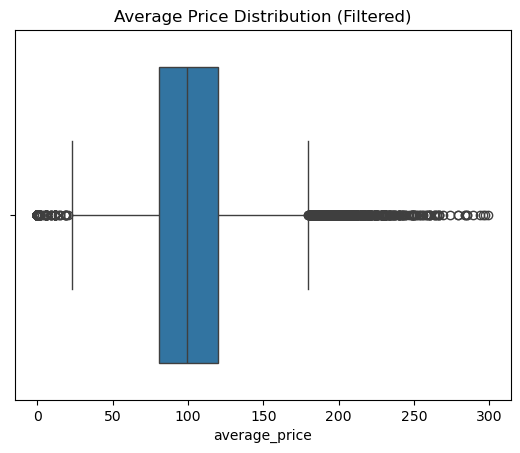

In [499]:
sns.boxplot(data=X_train, x='average_price')
plt.title('Average Price Distribution (Filtered)')

In [500]:
# remove lead time outliers 
mask2 = X_train['lead_time'] < 400
X_train = X_train[mask2]
y_train = y_train[mask2]

Text(0.5, 1.0, 'Lead Time Distribution (Filtered)')

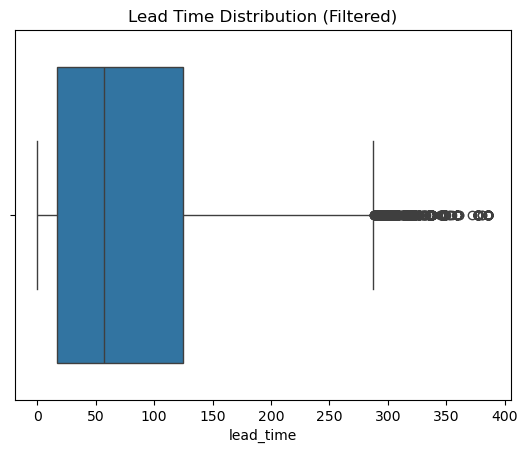

In [501]:
sns.boxplot(data=X_train, x='lead_time')
plt.title('Lead Time Distribution (Filtered)')

In [502]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28934 entries, 387 to 15795
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type_of_meal         28934 non-null  object 
 1   car_parking_space    28934 non-null  int64  
 2   room_type            28934 non-null  object 
 3   lead_time            28934 non-null  int64  
 4   market_segment_type  28934 non-null  object 
 5   repeated             28934 non-null  int64  
 6   p-c                  28934 non-null  int64  
 7   p-not-c              28934 non-null  int64  
 8   average_price        28934 non-null  float64
 9   special_requests     28934 non-null  int64  
 10  number_of_people     28934 non-null  int64  
 11  number_of_nights     28934 non-null  int64  
 12  year                 28934 non-null  int32  
 13  month                28934 non-null  int32  
 14  day                  28934 non-null  int32  
dtypes: float64(1), int32(3), int64(8), obje

In [503]:
cat = ['type_of_meal', 'room_type', 'market_segment_type']

In [504]:
# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[cat])
X_test_encoded = encoder.transform(X_test[cat])

# Convert to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat), index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat), index=X_test.index)

# Drop original categorical columns and combine with encoded columns
X_train = X_train.drop(columns=cat).reset_index(drop=True)
X_test = X_test.drop(columns=cat).reset_index(drop=True)
X_train_encoded = X_train_encoded.reset_index(drop=True)
X_test_encoded = X_test_encoded.reset_index(drop=True)

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [505]:
X_train.head()

,car_parking_space,lead_time,repeated,p-c,p-not-c,average_price,special_requests,number_of_people,number_of_nights,year,...,room_type_Room_Type 3,room_type_Room_Type 4,room_type_Room_Type 5,room_type_Room_Type 6,room_type_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0,155,0,0,0,115.6,1,3,4,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,48,0,0,0,149.4,0,1,4,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,305,0,0,0,89.0,0,2,3,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,102,0,0,0,86.4,2,1,2,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,9,0,0,0,221.0,0,4,3,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [506]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28934 entries, 0 to 28933
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   car_parking_space                  28934 non-null  int64  
 1   lead_time                          28934 non-null  int64  
 2   repeated                           28934 non-null  int64  
 3   p-c                                28934 non-null  int64  
 4   p-not-c                            28934 non-null  int64  
 5   average_price                      28934 non-null  float64
 6   special_requests                   28934 non-null  int64  
 7   number_of_people                   28934 non-null  int64  
 8   number_of_nights                   28934 non-null  int64  
 9   year                               28934 non-null  int32  
 10  month                              28934 non-null  int32  
 11  day                                28934 non-null  int

# Training and Evaluating model

In [507]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# train Random Forest model
model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 90.01%
Precision: 0.8841
Recall: 0.8035
F1-Score: 0.8419

Confusion Matrix:
[[4602  253]
 [ 472 1930]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4855
           1       0.88      0.80      0.84      2402

    accuracy                           0.90      7257
   macro avg       0.90      0.88      0.88      7257
weighted avg       0.90      0.90      0.90      7257



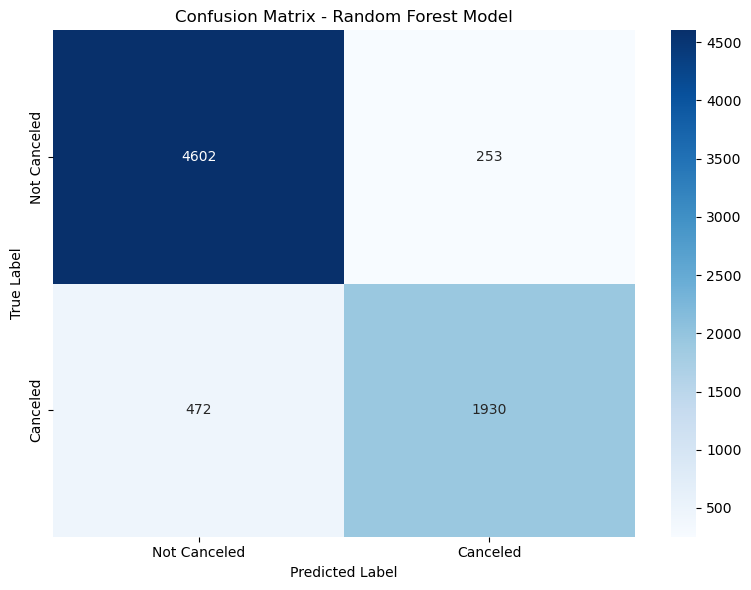

In [508]:
# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [509]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# train KNN model 
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = model_knn.predict(X_test)

# Evaluate the model
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Performance:
Accuracy: 81.27%
Precision: 0.7619
Recall: 0.6316
F1-Score: 0.6906

Confusion Matrix:
[[4381  474]
 [ 885 1517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4855
           1       0.76      0.63      0.69      2402

    accuracy                           0.81      7257
   macro avg       0.80      0.77      0.78      7257
weighted avg       0.81      0.81      0.81      7257



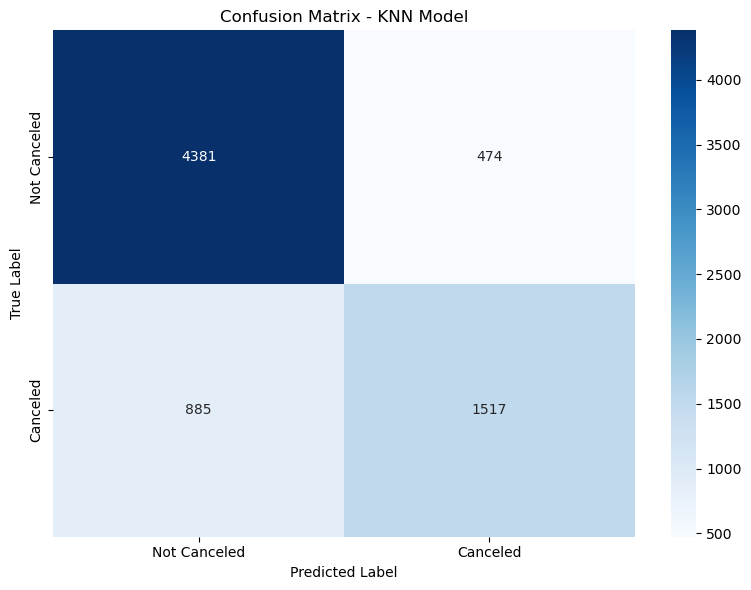

In [510]:
# Plot the confusion matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - KNN Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [511]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# train Decision Tree model 
model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = model_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_tree):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tree):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tree):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Model Performance:
Accuracy: 87.02%
Precision: 0.8027
Recall: 0.8060
F1-Score: 0.8043

Confusion Matrix:
[[4379  476]
 [ 466 1936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4855
           1       0.80      0.81      0.80      2402

    accuracy                           0.87      7257
   macro avg       0.85      0.85      0.85      7257
weighted avg       0.87      0.87      0.87      7257



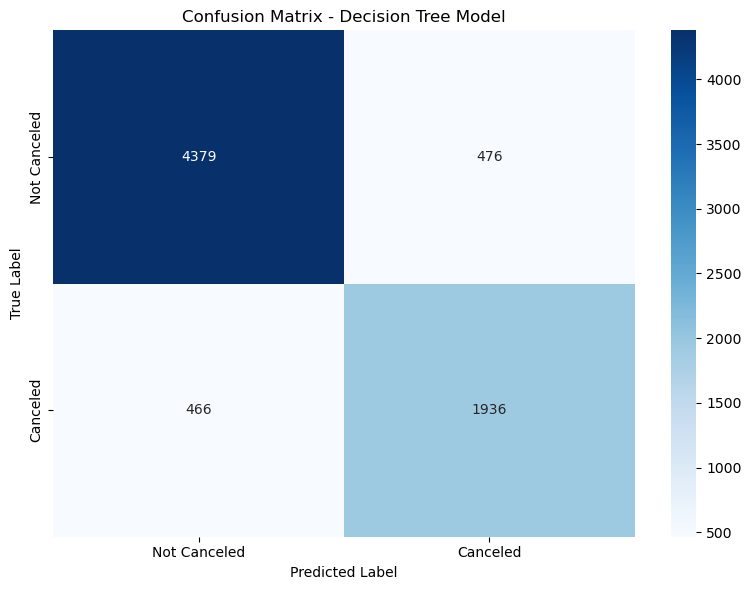

In [512]:
# Plot the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Decision Tree Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()